Implementation of FFT, Wavelet, and Pearson for testing

In [27]:
import numpy as np
import pandas as pd
from numpy.linalg import norm
from scipy.fftpack import fft, ifft
from scipy import signal
from sklearn.decomposition import PCA
import pywt

CORR_EMBEDDING_DIM = 256

def correlation_embedding(column: np.array, dim: int = CORR_EMBEDDING_DIM):
    # Compute the FFT
    fft_result = np.fft.fft(column)
    magnitude = np.abs(fft_result)
    phase = np.angle(fft_result)
    
    # Normalize magnitude
    if norm(magnitude) == 0:
        normalized_magnitude = magnitude
    else:
        normalized_magnitude = magnitude / norm(magnitude)

    # Reduce dimensionality and include phase
    reduced_magnitude = normalized_magnitude[:dim]
    reduced_phase = phase[:dim]
    return np.concatenate([reduced_magnitude, reduced_phase]).tolist()

def wavelet_transform(column: np.array, wavelet: str = 'db1'):
    coeffs = pywt.wavedec(column, wavelet)
    coeffs_flat = np.concatenate([c.flatten() for c in coeffs])
    return coeffs_flat[:CORR_EMBEDDING_DIM].tolist()

def perform_pca(dataframe, n_components=3):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(dataframe)
    return principal_components

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

if __name__ == "__main__":
    target_df = pd.read_parquet("../../../data/datasets/higgs/target.parquet")
    m_df = pd.read_parquet("../../../data/datasets/higgs/m.parquet")
    lepton_df = pd.read_parquet("../../../data/datasets/higgs/lepton.parquet")
    jet_df = pd.read_parquet("../../../data/datasets/higgs/jet.parquet")

    # Process additional columns
    mat_a = correlation_embedding(target_df["target"].to_numpy())
    mat_b = correlation_embedding(m_df["m_bb"].to_numpy())
    mat_c = correlation_embedding(lepton_df["lepton_pT"].to_numpy())
    mat_d = correlation_embedding(jet_df["jet_4_eta"].to_numpy())

    wmat_a = wavelet_transform(target_df["target"].to_numpy())
    wmat_b = wavelet_transform(m_df["m_bb"].to_numpy())
    wmat_c = wavelet_transform(lepton_df["lepton_pT"].to_numpy())
    wmat_d = wavelet_transform(jet_df["jet_4_eta"].to_numpy())

    

    # Cosine similarity calculations
    cos_sim_ab = cosine_similarity(mat_a, mat_b)
    cos_sim_ac = cosine_similarity(mat_a, mat_c)
    cos_sim_ad = cosine_similarity(mat_a, mat_d)

    wcos_sim_ab = cosine_similarity(wmat_a, wmat_b)
    wcos_sim_ac = cosine_similarity(wmat_a, wmat_c)
    wcos_sim_ad = cosine_similarity(wmat_a, wmat_d)

    print("\nSpecific Fourier Correlations:")
    print(f"Fourier Cosine Similarity between 'target' and 'm_bb': {cos_sim_ab}")
    print(f"Fourier Cosine Similarity between 'target' and 'lepton_pT': {cos_sim_ac}")
    print(f"Fourier Cosine Similarity between 'target' and 'jet_4_eta': {cos_sim_ad}")

    print("\nSpecific Wavelet Correlations:")
    print(f"Wavelet Cosine Similarity between 'target' and 'm_bb': {wcos_sim_ab}")
    print(f"Wavelet Cosine Similarity between 'target' and 'lepton_pT': {wcos_sim_ac}")
    print(f"Wavelet Cosine Similarity between 'target' and 'jet_4_eta': {wcos_sim_ad}")

    # Specifically print Pearson correlation between certain columns
    print("\nSpecific Pearson Correlations:")
    print(f"Pearson correlation between 'target' and 'm_bb': {correlation_matrix.loc['target', 'm_bb']}")
    print(f"Pearson correlation between 'target' and 'lepton_pT': {correlation_matrix.loc['target', 'lepton_pT']}")
    print(f"Pearson correlation between 'target' and 'jet_4_eta': {correlation_matrix.loc['target', 'jet_4_eta']}")

    # PCA on combined data
    combined_df = pd.concat([target_df, m_df, lepton_df, jet_df], axis=1)
    pca_result = perform_pca(combined_df)
    print("PCA Result:", pca_result)

    # Combine the dataframes for easier correlation computation
    combined_df = pd.concat([target_df, m_df, lepton_df, jet_df], axis=1)

    # Calculate Pearson correlation
    correlation_matrix = combined_df.corr()

    # Print the Pearson correlation matrix
    print("Pearson Correlation Matrix:")
    print(correlation_matrix)


Specific Fourier Correlations:
Fourier Cosine Similarity between 'target' and 'm_bb': 0.42443308413628794
Fourier Cosine Similarity between 'target' and 'lepton_pT': 0.10839702206202767
Fourier Cosine Similarity between 'target' and 'jet_4_eta': -0.033311373626559865

Specific Wavelet Correlations:
Wavelet Cosine Similarity between 'target' and 'm_bb': 0.7953298393564102
Wavelet Cosine Similarity between 'target' and 'lepton_pT': 0.7608081981717613
Wavelet Cosine Similarity between 'target' and 'jet_4_eta': 0.017633560900054267

Specific Pearson Correlations:
Pearson correlation between 'target' and 'm_bb': 0.15218468093127616
Pearson correlation between 'target' and 'lepton_pT': 0.04896847724091558
Pearson correlation between 'target' and 'jet_4_eta': -4.381455941162175e-05
PCA Result: [[-9.40159000e+05 -6.33236373e-01 -3.42757957e-01]
 [-9.40157000e+05 -2.48753780e-01 -1.31514024e-02]
 [-9.40155000e+05  9.60899879e-01  1.79216851e+00]
 ...
 [ 9.40155000e+05 -1.42926128e+00 -4.277428

Testing various functions within wavelet to attempt to improve wavelet. 

In [37]:
import numpy as np
import pandas as pd
import pywt
from sklearn.metrics.pairwise import cosine_similarity

CORR_EMBEDDING_DIM = 256  # Assuming a dimension of 5 for correlation embedding

def wavelet_transform(column: np.array, wavelet: str = 'db1'):
    coeffs = pywt.wavedec(column, wavelet)
    coeffs_flat = np.concatenate([c.flatten() for c in coeffs])
    return coeffs_flat[:CORR_EMBEDDING_DIM].tolist()

if __name__ == "__main__":
    target_df = pd.read_parquet("../../../data/datasets/higgs/target.parquet")
    m_df = pd.read_parquet("../../../data/datasets/higgs/m.parquet")
    lepton_df = pd.read_parquet("../../../data/datasets/higgs/lepton.parquet")
    jet_df = pd.read_parquet("../../../data/datasets/higgs/jet.parquet")
    
    wavelets = ['db1', 'db2', 'db3', 'db4']
    
    for wavelet in wavelets:
        wmat_a = wavelet_transform(target_df["target"].to_numpy(), wavelet)
        wmat_b = wavelet_transform(m_df["m_bb"].to_numpy(), wavelet)
        wmat_c = wavelet_transform(lepton_df["lepton_pT"].to_numpy(), wavelet)
        wmat_d = wavelet_transform(jet_df["jet_4_eta"].to_numpy(), wavelet)

        wcos_sim_ab = cosine_similarity([wmat_a], [wmat_b])[0][0]
        wcos_sim_ac = cosine_similarity([wmat_a], [wmat_c])[0][0]
        wcos_sim_ad = cosine_similarity([wmat_a], [wmat_d])[0][0]

        print(f"\nResults for Wavelet {wavelet}:")
        print("Wavelet Cosine Similarity:")
        print(f"Between 'target' and 'm_bb': {wcos_sim_ab}")
        print(f"Between 'target' and 'lepton_pT': {wcos_sim_ac}")
        print(f"Between 'target' and 'jet_4_eta': {wcos_sim_ad}")
    
    # Add the code for computing Pearson correlation matrix here or ensure `correlation_matrix` is defined
    print("\nSpecific Fourier Correlations:")
    print(f"Fourier Cosine Similarity between 'target' and 'm_bb': {cos_sim_ab}")
    print(f"Fourier Cosine Similarity between 'target' and 'lepton_pT': {cos_sim_ac}")
    print(f"Fourier Cosine Similarity between 'target' and 'jet_4_eta': {cos_sim_ad}")

    # Specifically print Pearson correlation between certain columns
    print("\nSpecific Pearson Correlations:")
    print(f"Pearson correlation between 'target' and 'm_bb': {correlation_matrix.loc['target', 'm_bb']}")
    print(f"Pearson correlation between 'target' and 'lepton_pT': {correlation_matrix.loc['target', 'lepton_pT']}")
    print(f"Pearson correlation between 'target' and 'jet_4_eta': {correlation_matrix.loc['target', 'jet_4_eta']}")


Results for Wavelet db1:
Wavelet Cosine Similarity:
Between 'target' and 'm_bb': 0.7953298393564103
Between 'target' and 'lepton_pT': 0.760808198171761
Between 'target' and 'jet_4_eta': 0.017633560900054267

Results for Wavelet db2:
Wavelet Cosine Similarity:
Between 'target' and 'm_bb': 0.7028741316505563
Between 'target' and 'lepton_pT': 0.6761528898696129
Between 'target' and 'jet_4_eta': 0.04147554064034677

Results for Wavelet db3:
Wavelet Cosine Similarity:
Between 'target' and 'm_bb': 0.6919615043093414
Between 'target' and 'lepton_pT': 0.6904608696790915
Between 'target' and 'jet_4_eta': 0.07321375518384479

Results for Wavelet db4:
Wavelet Cosine Similarity:
Between 'target' and 'm_bb': 0.6544915333135461
Between 'target' and 'lepton_pT': 0.6575372323249494
Between 'target' and 'jet_4_eta': 0.1745415164756038

Specific Fourier Correlations:
Fourier Cosine Similarity between 'target' and 'm_bb': 0.42443308413628794
Fourier Cosine Similarity between 'target' and 'lepton_pT': 0.

Statistical significance comparison of T-testing

In [32]:
from scipy.stats import ttest_rel
import numpy as np
import pandas as pd

def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Define the pairs manually since it's just two columns for demonstration
pairs = [(target_df["target"].to_numpy(), m_df["m_bb"].to_numpy())]

# Assuming 'correlation_embedding' and 'wavelet_transform' are defined as previously described
fourier_similarities = np.array([cosine_similarity(correlation_embedding(column1), correlation_embedding(column2)) for column1, column2 in pairs])
wavelet_similarities = np.array([cosine_similarity(wavelet_transform(column1), wavelet_transform(column2)) for column1, column2 in pairs])

# Perform a paired t-test
t_stat, p_value = ttest_rel(fourier_similarities, wavelet_similarities)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

print("Fourier similarities:", fourier_similarities)
print("Wavelet similarities:", wavelet_similarities)


# Interpret the results
if p_value < 0.05:
    print("Wavelet transform shows a statistically significant improvement over Fourier transform.")
else:
    print("No significant difference between the transforms.")


T-statistic: nan, P-value: nan
Fourier similarities: [0.42443308]
Wavelet similarities: [0.79532984]
No significant difference between the transforms.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


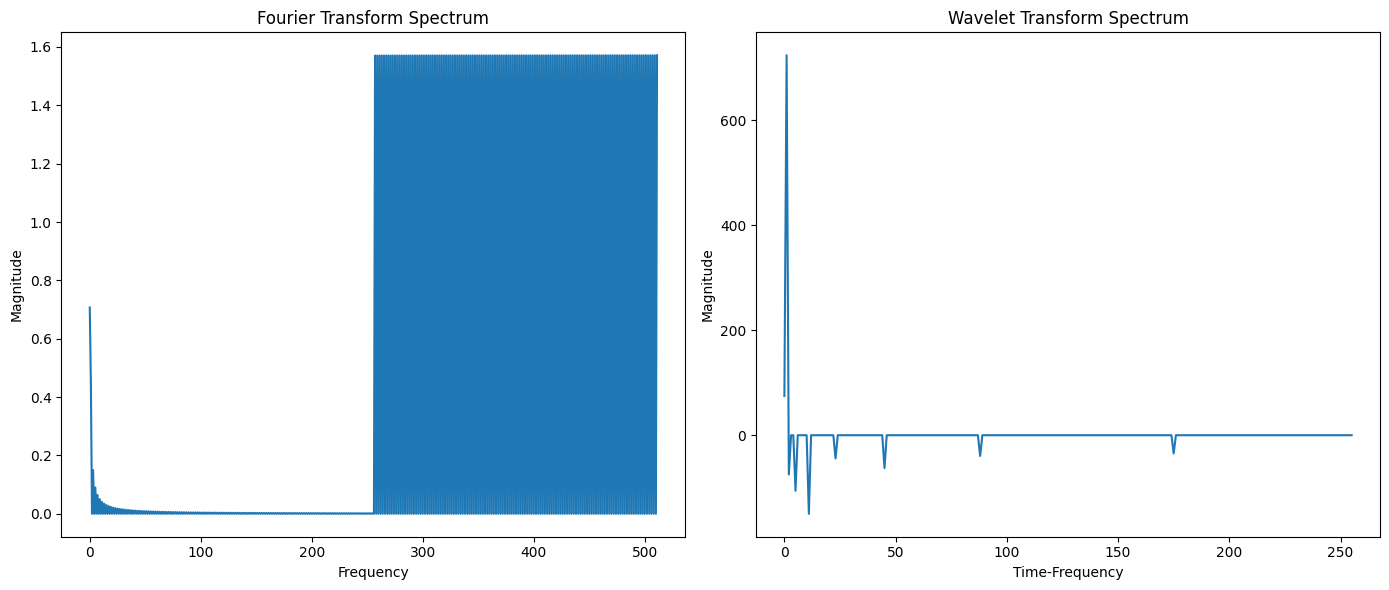

In [33]:
import matplotlib.pyplot as plt

# Assuming 'correlation_embedding' returns only the magnitudes for simplicity
freq_spectrum_fourier = correlation_embedding(target_df["target"].to_numpy())
time_freq_spectrum_wavelet = wavelet_transform(target_df["target"].to_numpy())

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(freq_spectrum_fourier)
plt.title('Fourier Transform Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.subplot(1, 2, 2)
plt.plot(time_freq_spectrum_wavelet)
plt.title('Wavelet Transform Spectrum')
plt.xlabel('Time-Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import pywt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cosine

def correlation_embedding(column: np.array, dim: int = 256):
    fft_result = np.fft.fft(column)
    magnitude = np.abs(fft_result)
    phase = np.angle(fft_result)
    if norm(magnitude) == 0:
        normalized_magnitude = magnitude
    else:
        normalized_magnitude = magnitude / norm(magnitude)
    reduced_magnitude = normalized_magnitude[:dim]
    reduced_phase = phase[:dim]
    return np.concatenate([reduced_magnitude, reduced_phase])

def wavelet_transform(column: np.array, wavelet: str = 'db1', dim: int = 256):
    coeffs = pywt.wavedec(column, wavelet)
    coeffs_flat = np.concatenate([c.flatten() for c in coeffs])
    return coeffs_flat[:dim]

def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

# Load data
target_df = pd.read_parquet("../../../data/datasets/higgs/target.parquet")
m_df = pd.read_parquet("../../../data/datasets/higgs/m.parquet")

# Pearson correlation
pearson_corr = target_df.corrwith(m_df, method='pearson')
print("Pearson Correlation:", pearson_corr)

# Fourier and Wavelet Transforms
fourier_a = correlation_embedding(target_df["target"].to_numpy())
fourier_b = correlation_embedding(m_df["m_bb"].to_numpy())
wavelet_a = wavelet_transform(target_df["target"].to_numpy())
wavelet_b = wavelet_transform(m_df["m_bb"].to_numpy())

# Cosine similarity for Fourier and Wavelet
cos_sim_fourier = cosine_similarity(fourier_a, fourier_b)
cos_sim_wavelet = cosine_similarity(wavelet_a, wavelet_b)

print("Cosine Similarity (Fourier):", cos_sim_fourier)
print("Cosine Similarity (Wavelet):", cos_sim_wavelet)


Pearson Correlation: index     1.0
m_bb      NaN
m_jj      NaN
m_jjj     NaN
m_jlv     NaN
m_lv      NaN
m_wbb     NaN
m_wwbb    NaN
target    NaN
dtype: float64
Cosine Similarity (Fourier): 0.424433084136288
Cosine Similarity (Wavelet): 0.7953298393564102
